# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import hvplot
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key
city_url = url + "&q=" + str(city) + "&units=metric"

city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

city_date = city_weather["dt"]

unix_city_date = int(city_date)
city_date = str(datetime.utcfromtimestamp(unix_city_date).strftime('%Y-%m-%d'))

print(city_date)

2023-04-23


In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city and set units equal to metric
    city_url = url + "&q=" + str(city) + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        unix_city_date = int(city_weather["dt"])
        city_date = str(datetime.utcfromtimestamp(unix_city_date).strftime('%Y-%m-%d'))

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"{city} not found. Skipping {city}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | inirida
Processing Record 2 of Set 1 | junin de los andes
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | taiohae
taiohae not found. Skipping taiohae
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | keflavik
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | santa ana
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | soller
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | worland
Processing Record 19 of Set 1 | glencoe
Processing Record 20 of Set 1 | haiku-pauwela
Processing Record 21 of Set 1 | tual
Processing Record 

Processing Record 34 of Set 4 | saksaul'skiy
saksaul'skiy not found. Skipping saksaul'skiy
Processing Record 35 of Set 4 | byron bay
Processing Record 36 of Set 4 | chonchi
Processing Record 37 of Set 4 | ilulissat
Processing Record 38 of Set 4 | magistral'nyy
Processing Record 39 of Set 4 | nova sintra
Processing Record 40 of Set 4 | ulladulla
Processing Record 41 of Set 4 | karratha
Processing Record 42 of Set 4 | hanchuan
Processing Record 43 of Set 4 | chita
Processing Record 44 of Set 4 | arthur's town
arthur's town not found. Skipping arthur's town
Processing Record 45 of Set 4 | aghajari
Processing Record 46 of Set 4 | filadelfia
Processing Record 47 of Set 4 | marineo
Processing Record 48 of Set 4 | kota kinabalu
Processing Record 49 of Set 4 | santiago de compostela
Processing Record 0 of Set 5 | lubang
Processing Record 1 of Set 5 | cherdyn'
Processing Record 2 of Set 5 | butte
Processing Record 3 of Set 5 | saipan
Processing Record 4 of Set 5 | brisas de zicatela
Processing 

Processing Record 20 of Set 8 | mejit
Processing Record 21 of Set 8 | kem'
Processing Record 22 of Set 8 | itoman
Processing Record 23 of Set 8 | fukuecho
Processing Record 24 of Set 8 | altai
Processing Record 25 of Set 8 | shendi
Processing Record 26 of Set 8 | reggane
Processing Record 27 of Set 8 | taltal
Processing Record 28 of Set 8 | mukalla
Processing Record 29 of Set 8 | chui
Processing Record 30 of Set 8 | kununurra
Processing Record 31 of Set 8 | kapoeta
Processing Record 32 of Set 8 | onega
Processing Record 33 of Set 8 | seogwipo
seogwipo not found. Skipping seogwipo
Processing Record 34 of Set 8 | leava
Processing Record 35 of Set 8 | port augusta
Processing Record 36 of Set 8 | greater upper marlboro
greater upper marlboro not found. Skipping greater upper marlboro
Processing Record 37 of Set 8 | linhares
Processing Record 38 of Set 8 | newman
Processing Record 39 of Set 8 | haisyn
Processing Record 40 of Set 8 | buritama
Processing Record 41 of Set 8 | kabwe
Processing 

Processing Record 5 of Set 12 | la paz
Processing Record 6 of Set 12 | sept-iles
Processing Record 7 of Set 12 | kawthoung
kawthoung not found. Skipping kawthoung
Processing Record 8 of Set 12 | savalou
Processing Record 9 of Set 12 | baukau
Processing Record 10 of Set 12 | hoemul-li
Processing Record 11 of Set 12 | broome
Processing Record 12 of Set 12 | mutum
Processing Record 13 of Set 12 | vilcun
Processing Record 14 of Set 12 | cherokee
Processing Record 15 of Set 12 | buala
Processing Record 16 of Set 12 | okhotsk
Processing Record 17 of Set 12 | bani yas city
bani yas city not found. Skipping bani yas city
Processing Record 18 of Set 12 | krosno odrzanskie
Processing Record 19 of Set 12 | pasighat
Processing Record 20 of Set 12 | saint-joseph
Processing Record 21 of Set 12 | gonaives
Processing Record 22 of Set 12 | longboat key
Processing Record 23 of Set 12 | kerben
Processing Record 24 of Set 12 | katsuura
Processing Record 25 of Set 12 | kentville
---------------------------

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inirida,3.8653,-67.9239,24.02,98,100,0.42,CO,2023-04-23
1,junin de los andes,-39.9504,-71.0694,13.75,65,3,1.20,AR,2023-04-23
2,edinburgh of the seven seas,-37.0676,-12.3116,15.47,86,100,12.30,SH,2023-04-23
3,albany,42.6001,-73.9662,11.61,86,97,2.90,US,2023-04-23
4,hamilton,39.1834,-84.5333,8.82,53,100,6.17,US,2023-04-23


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,inirida,3.8653,-67.9239,24.02,98,100,0.42,CO,2023-04-23
1,junin de los andes,-39.9504,-71.0694,13.75,65,3,1.20,AR,2023-04-23
2,edinburgh of the seven seas,-37.0676,-12.3116,15.47,86,100,12.30,SH,2023-04-23
3,albany,42.6001,-73.9662,11.61,86,97,2.90,US,2023-04-23
4,hamilton,39.1834,-84.5333,8.82,53,100,6.17,US,2023-04-23


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

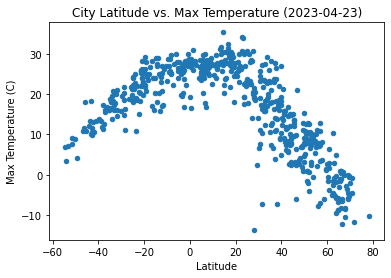

In [23]:
# Build scatter plot for latitude vs. temperature
lat_temp = city_data_df.plot("Lat", "Max Temp", kind="scatter")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
date = city_data_df["Date"][0]
plt.title(f"City Latitude vs. Max Temperature ({date})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

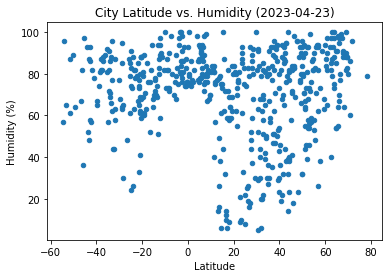

In [22]:
# Build the scatter plots for latitude vs. humidity
lat_hum = city_data_df.plot("Lat", "Humidity", kind="scatter")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
date = city_data_df["Date"][0]
plt.title(f"City Latitude vs. Humidity ({date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

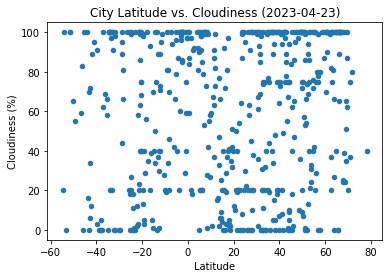

In [21]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud = city_data_df.plot("Lat", "Cloudiness", kind="scatter")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
date = city_data_df["Date"][0]
plt.title(f"City Latitude vs. Cloudiness ({date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

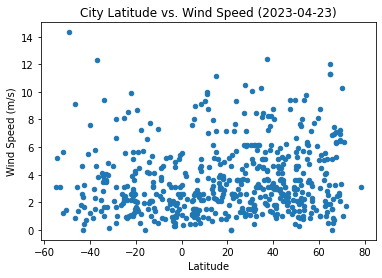

In [20]:
# Build the scatter plots for latitude vs. wind speed
lat_wind = city_data_df.plot("Lat", "Wind Speed", kind="scatter")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
date = city_data_df["Date"][0]
plt.title(f"City Latitude vs. Wind Speed ({date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
    #function takes inputs for x and y values; inputs will need entered as strings
def lin_regress(dataframe, x_axis, y_axis):
    x_values = dataframe[x_axis]
    y_values = dataframe[y_axis]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return ((x_values, y_values, rvalue, regress_values, line_eq))

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,inirida,3.8653,-67.9239,24.02,98,100,0.42,CO,2023-04-23
3,albany,42.6001,-73.9662,11.61,86,97,2.90,US,2023-04-23
4,hamilton,39.1834,-84.5333,8.82,53,100,6.17,US,2023-04-23
7,iqaluit,63.7506,-68.5145,-0.15,100,100,5.14,CA,2023-04-23
8,klyuchi,52.2667,79.1667,7.59,54,89,7.56,RU,2023-04-23


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,junin de los andes,-39.9504,-71.0694,13.75,65,3,1.20,AR,2023-04-23
2,edinburgh of the seven seas,-37.0676,-12.3116,15.47,86,100,12.30,SH,2023-04-23
5,atafu village,-8.5421,-172.5159,28.67,73,34,2.22,TK,2023-04-23
6,grytviken,-54.2811,-36.5092,3.52,96,100,5.20,GS,2023-04-23
11,west island,-12.1568,96.8225,26.99,89,40,4.12,CC,2023-04-23


###  Temperature vs. Latitude Linear Regression Plot

The r values is: -0.8645986798075053


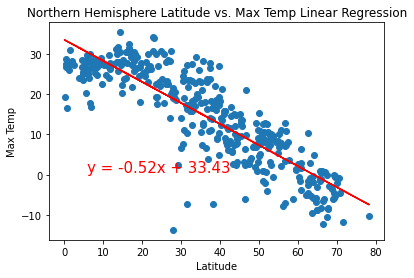

In [66]:
# Linear regression on Northern Hemisphere
(x_values, y_values, rvalue, regress_values, line_eq) = lin_regress(northern_hemi_df, 'Lat', 'Max Temp')
print(f"The r values is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
xlabel = 'Latitude'
ylabel = 'Max Temp'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"Northern Hemisphere {xlabel} vs. {ylabel} Linear Regression")
plt.show()


The r values is: 0.8244213308821744


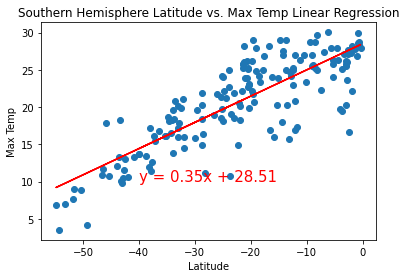

In [67]:
# Linear regression on Southern Hemisphere
(x_values, y_values, rvalue, regress_values, line_eq) = lin_regress(southern_hemi_df, 'Lat', 'Max Temp')
print(f"The r values is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),xycoords='data', fontsize=15,color="red")
xlabel = 'Latitude'
ylabel = 'Max Temp'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"Southern Hemisphere {xlabel} vs. {ylabel} Linear Regression")
plt.show()

**Discussion about the linear relationship:** In regards to latitiude vs max temp, the northern hemisphere has a negative correlation - as latitude increases, max temp decreases. In regards to latitiude vs max temp, the southern hemisphere has a postive correlation - as latitude increases, max temp decrease.

### Humidity vs. Latitude Linear Regression Plot

The r values is: 0.1258366717371019


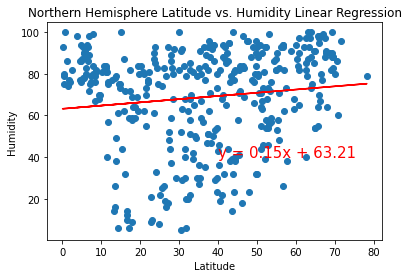

In [52]:
# Linear regression on Northern Hemisphere
(x_values, y_values, rvalue, regress_values, line_eq) = lin_regress(northern_hemi_df, 'Lat', 'Humidity')
print(f"The r values is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
xlabel = 'Latitude'
ylabel = 'Humidity'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"Northern Hemisphere {xlabel} vs. {ylabel} Linear Regression")
plt.show()

The r values is: 0.2138115810633773


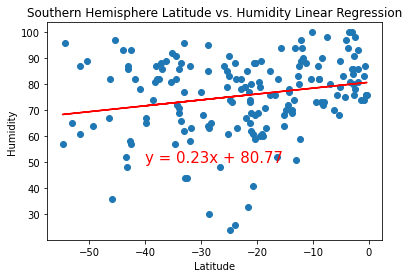

In [68]:
# Linear regression on Southern Hemisphere
(x_values, y_values, rvalue, regress_values, line_eq) = lin_regress(southern_hemi_df, 'Lat', 'Humidity')
print(f"The r values is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),xycoords='data',fontsize=15,color="red")
xlabel = 'Latitude'
ylabel = 'Humidity'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"Southern Hemisphere {xlabel} vs. {ylabel} Linear Regression")
plt.show()

**Discussion about the linear relationship:** In regards to latitiude vs humidity for both the northern hemisphere and southern hemisphere, the small r values lead to a conclusion that there is no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r values is: 0.14566633686818228


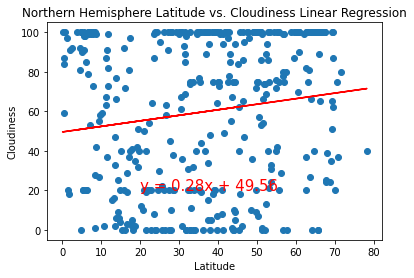

In [69]:
# Linear regression on Northern Hemisphere
(x_values, y_values, rvalue, regress_values, line_eq) = lin_regress(northern_hemi_df, 'Lat', 'Cloudiness')
print(f"The r values is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
xlabel = 'Latitude'
ylabel = 'Cloudiness'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"Northern Hemisphere {xlabel} vs. {ylabel} Linear Regression")
plt.show()

The r values is: 0.1740279381792823


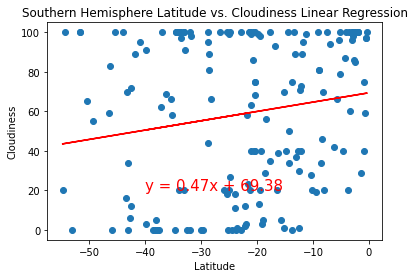

In [70]:
# Linear regression on Southern Hemisphere
(x_values, y_values, rvalue, regress_values, line_eq) = lin_regress(southern_hemi_df, 'Lat', 'Cloudiness')
print(f"The r values is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),xycoords='data',fontsize=15,color="red")
xlabel = 'Latitude'
ylabel = 'Cloudiness'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"Southern Hemisphere {xlabel} vs. {ylabel} Linear Regression")
plt.show()

**Discussion about the linear relationship:** In regards to latitiude vs cloudiness for both the northern hemisphere and southern hemisphere, the small r values lead to a conclusion that there is no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r values is: 0.1076059210322612


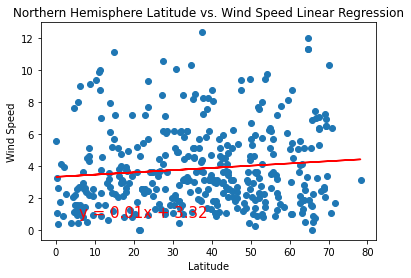

In [63]:
# Linear regression on Northern Hemisphere
(x_values, y_values, rvalue, regress_values, line_eq) = lin_regress(northern_hemi_df, 'Lat', 'Wind Speed')
print(f"The r values is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
xlabel = 'Latitude'
ylabel = 'Wind Speed'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"Northern Hemisphere {xlabel} vs. {ylabel} Linear Regression")
plt.show()

The r values is: -0.16409457582635179


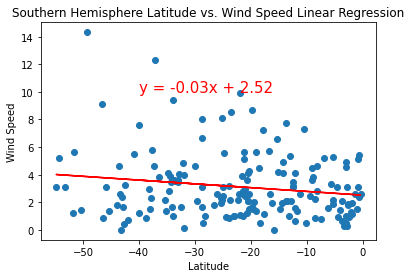

In [71]:
# Linear regression on Southern Hemisphere
(x_values, y_values, rvalue, regress_values, line_eq) = lin_regress(southern_hemi_df, 'Lat', 'Wind Speed')
print(f"The r values is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),xycoords='data',fontsize=15,color="red")
xlabel = 'Latitude'
ylabel = 'Wind Speed'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(f"Southern Hemisphere {xlabel} vs. {ylabel} Linear Regression")
plt.show()

**Discussion about the linear relationship:** In regards to latitiude vs wind speed for both the northern hemisphere and southern hemisphere, the small r values lead to a conclusion that there is no correlation between latitude and wind speed.